In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Original dataset

In [4]:
# from src.dataset.shape_cor import PairFaustDataset

# dataset = PairFaustDataset(
#     phase='train',
#     data_root='../../data/FAUST_r/',
#     return_evecs='true',
#     return_faces='true',
#     num_evecs=200,
#     return_corr='false',
#     return_dist='false',
# )

In [5]:
# import time
# start_time = time.time()

# for idx, data in enumerate(dataset):
#     if idx >= 10:
#         break

# end_time = time.time()
# sample_per_sec = 10 / (end_time - start_time)
# eta = len(dataset) / sample_per_sec / 60
# print(f"total: {10 / (sample_per_sec)} sample/s | eta: {eta} min")
# # total: 2.158205032348633 sample/s | eta: 23.020853678385414 min

## Fast dataset

In [ ]:
from src.dataset.shape_cor_fast import PairFaustDatasetFast

dataset = PairFaustDatasetFast(
    data_root='../../data_/FAUST_r',
    phase='train',
    return_faces=True,
    return_L=True,
    return_mass=True,
    num_evecs=200,
    return_evecs=True,
    return_grad=True,
    return_corr=True,
    return_dist=True,
)
len(dataset)

6400

In [ ]:
from tqdm import tqdm

for data in tqdm(dataset):
    # pass
    break

  0%|          | 0/6400 [00:00<?, ?it/s]

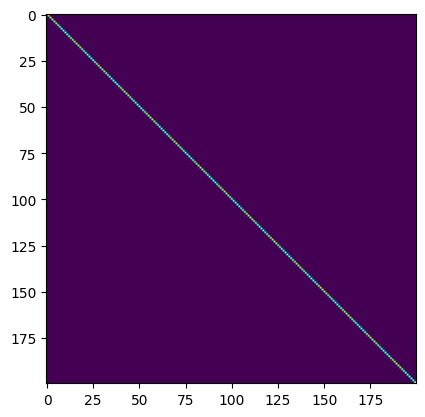

In [31]:
import matplotlib.pyplot as plt
plt.imshow(data['first']['evecs_trans'] @ data['first']['evecs'])
plt.show()

## Batched dataloader

In [ ]:
from tqdm import tqdm
from src.dataloader.shape_cor_batch import BatchShapePairDataLoader

batch_loader = BatchShapePairDataLoader(
    dataset=dataset,
    batch_size=8,
    shuffle=True,
    num_workers=4,
)

for batch in tqdm(batch_loader, total=len(batch_loader)):
    pass

100%|██████████| 800/800 [00:44<00:00, 17.91it/s]


In [97]:
from tqdm import tqdm
from src.dataloader.shape_cor_batch import BatchShapePairDataLoader

batch_loader = BatchShapePairDataLoader(
    dataset=dataset,
    batch_size=16,
    shuffle=True,
    num_workers=4,
)

for batch in tqdm(batch_loader, total=len(batch_loader)):
    pass

100%|██████████| 400/400 [00:44<00:00,  8.91it/s]


In [98]:
batch

{'first': {'name': ['tr_reg_060',
   'tr_reg_065',
   'tr_reg_068',
   'tr_reg_078',
   'tr_reg_054',
   'tr_reg_001',
   'tr_reg_013',
   'tr_reg_020',
   'tr_reg_054',
   'tr_reg_015',
   'tr_reg_000',
   'tr_reg_029',
   'tr_reg_006',
   'tr_reg_002',
   'tr_reg_075',
   'tr_reg_035'],
  'num_verts': [5000,
   5001,
   4999,
   5003,
   5003,
   5000,
   5000,
   5003,
   5003,
   5000,
   4999,
   5002,
   5000,
   4999,
   5003,
   4999],
  'verts': tensor([[[ 0.0368,  0.5959,  0.1140],
           [ 0.0556,  0.5975,  0.0998],
           [ 0.0606,  0.5336,  0.0762],
           ...,
           [ 0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000]],
  
          [[-0.0318,  0.5750,  0.1068],
           [-0.0319,  0.5859,  0.0996],
           [ 0.0244,  0.5361,  0.0814],
           ...,
           [ 0.1460, -0.6624,  0.0087],
           [ 0.0000,  0.0000,  0.0000],
           [ 0.0000,  0.0000,  0.0000]],
  
          [[-0.0355,  0